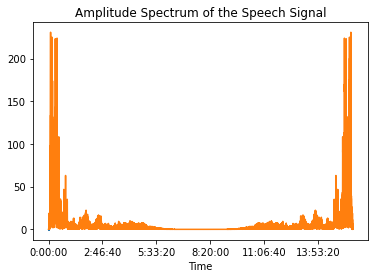

In [12]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
y, sr = librosa.load(r"E:\New folder (2)\Speech_Processing1.wav")
librosa.display.waveshow(y)
fft_y = np.fft.fft(y, n=None, axis=-1, norm=None)
amplitude = np.abs(fft_y)
 
# Plot the amplitude spectrum
plt.plot(amplitude)
plt.title("Amplitude Spectrum of the Speech Signal")
plt.show()

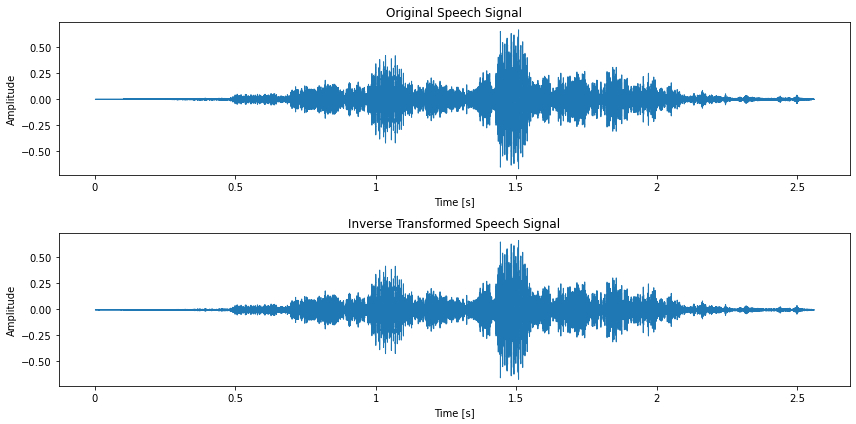

In [13]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
y, sr = librosa.load(r"E:\New folder (2)\Speech_Processing1.wav")
fft_y = np.fft.fft(y, n=None, axis=-1, norm=None)
freq = np.linspace(0, sr / 2, len(fft_y) // 2)
amplitude = np.abs(fft_y)
phase = np.angle(fft_y)
ifft_y = np.fft.ifft(amplitude * np.exp(1j * phase))
ifft_y = np.real(ifft_y)
plt.figure(figsize=(12, 6))
plt.subplot(211)
librosa.display.waveshow(y)
plt.title("Original Speech Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(212)
librosa.display.waveshow(ifft_y)
plt.title("Inverse Transformed Speech Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

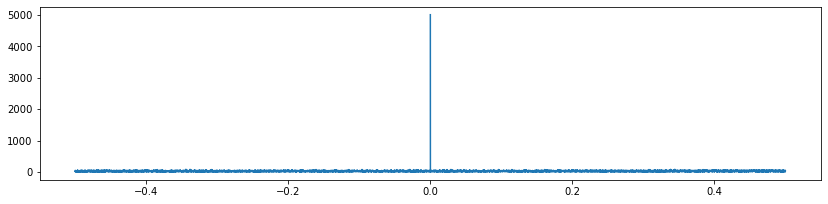

In [17]:
import numpy as np
import matplotlib.pyplot as plt

recorded_speech_signal = np.random.rand(44100)  
word_start_index = 10000
word_end_index = 20000
word_signal = recorded_speech_signal[word_start_index:word_end_index]
fft_word = np.fft.fft(word_signal)
freq_word = np.fft.fftfreq(len(word_signal))
fft_full_signal = np.fft.fft(recorded_speech_signal)
freq_full_signal = np.fft.fftfreq(len(recorded_speech_signal))
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(freq_word, np.abs(fft_word))
plt.show()


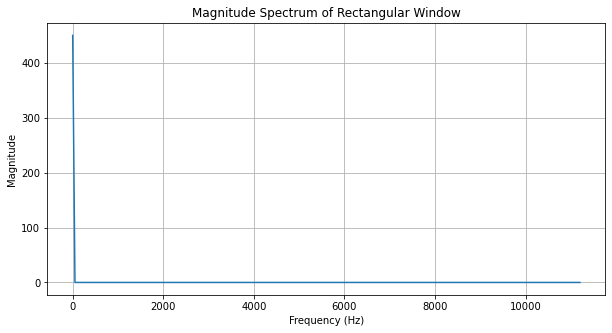

In [21]:
import numpy as np
import matplotlib.pyplot as plt
sample_rate = 22500  # Hz
window_duration = 0.02 
num_samples = int(sample_rate * window_duration)
t = np.linspace(0, window_duration, num_samples, endpoint=False)
rect_window = np.ones(num_samples)
fft_result = np.fft.fft(rect_window)
freqs = np.fft.fftfreq(num_samples, 1/sample_rate)
magnitude_spectrum = np.abs(fft_result)
plt.figure(figsize=(10, 5))
plt.plot(freqs[:num_samples//2], magnitude_spectrum[:num_samples//2])
plt.title('Magnitude Spectrum of Rectangular Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


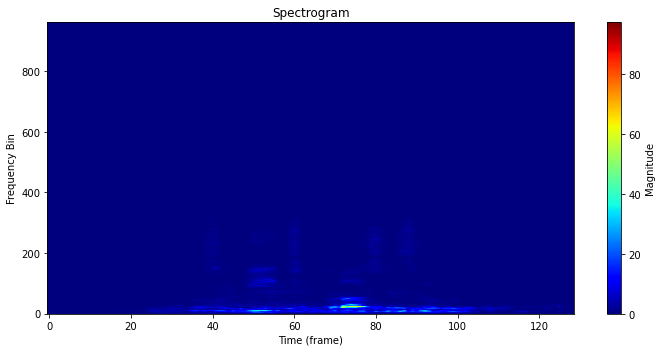

In [24]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
audio_file = r"E:\New folder (2)\Speech_Processing1.wav"
y, sr = librosa.load(audio_file, sr=None)
window_length_sec = 0.02  # 20 ms
hop_length = int(sr * window_length_sec)
D = librosa.stft(y, n_fft=hop_length*2, hop_length=hop_length)
magnitude_spectrum = np.abs(D)
num_frames = magnitude_spectrum.shape[1]
max_freq_index = magnitude_spectrum.shape[0]
spectrogram_matrix = np.zeros((max_freq_index, num_frames))
for i in range(num_frames):
    spectrogram_matrix[:, i] = magnitude_spectrum[:, i]
plt.figure(figsize=(10, 5))
plt.imshow(spectrogram_matrix, aspect='auto', origin='lower', cmap='jet')
plt.xlabel('Time (frame)')
plt.ylabel('Frequency Bin')
plt.title('Spectrogram')
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()


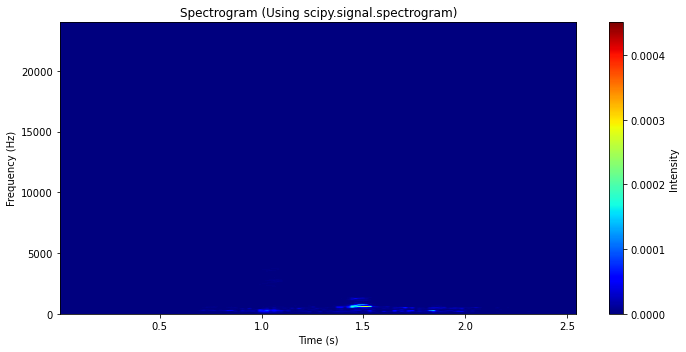

In [26]:
import scipy.signal as sg
frequencies, times, Sxx = sg.spectrogram(y, sr, nperseg=int(window_length_sec*sr))
plt.figure(figsize=(10, 5))
plt.imshow(Sxx, aspect='auto', origin='lower', cmap='jet', extent=(times.min(), times.max(), frequencies.min(), frequencies.max()))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram (Using scipy.signal.spectrogram)')
plt.colorbar(label='Intensity')
plt.tight_layout()
plt.show()